# Breast Cancer Diagnostic Machine Learning R-Forest

### Used Libraries
1. NumPy (Numerical Python)
2. Pandas
3. Matplotlib
4. Seaborn
5. Sckit learn
6. Missingno

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### Content:
1. Pandas Profiling Report
2. Missingo - Missing Data
3. Seaborn - Heatmap
4. Separating Features and Labels
5. Converting String Value To int Type for Labels
6. Data Standardisation
7. Splitting Dataset into Training Set and Testing Set
8. Build Random Forest Model with Default Hyperparameter
9. Accuracy Score
10. Confusion Matrix with Seaborn - Heatmap
11. F1 Score

### Reading Data

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.sample(5)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
107  863270         B        12.36         18.54           79.01      466.7   
511  915664         B        14.81         14.70           94.66      680.7   
568   92751         B         7.76         24.54           47.92      181.0   
305  893061         B        11.60         24.49           74.23      417.2   
105  863030         M        13.11         15.56           87.21      530.2   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
107          0.08477           0.06815         0.02643              0.01921   
511          0.08472           0.05016         0.03416              0.02541   
568          0.05263           0.04362         0.00000              0.00000   
305          0.07474           0.05688         0.01974              0.01313   
105          0.13980           0.17650         0.20710              0.09601   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
107  ...          27.49            85.56       544.1           0.11840   
511  ...          17.58           101.70       760.2           0.11390   
568  ...          30.37            59.16       268.6           0.08996   
305  ...          31.62            81.39       476.5           0.09545   
105  ...          22.40           106.40       827.2           0.18620   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
107            0.19630          0.19370               0.08442          0.2983   
511            0.10110          0.11010               0.07955          0.2334   
568            0.06444          0.00000               0.00000          0.2871   
305            0.13610          0.07239               0.04815          0.3244   
105            0.40990          0.63760               0.19860          0.3147   

     fractal_dimension_worst  Unnamed: 32  
107                  0.07185          NaN  
511                  0.06142          NaN  
568                  0.07039          NaN  
305                  0.06745          NaN  
105                  0.14050          NaN  

[5 rows x 33 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

# Pandas Profiling Report

In [5]:
report = pp.ProfileReport(df)

report.to_file("report.html")

report

# Missingno - Missing Data

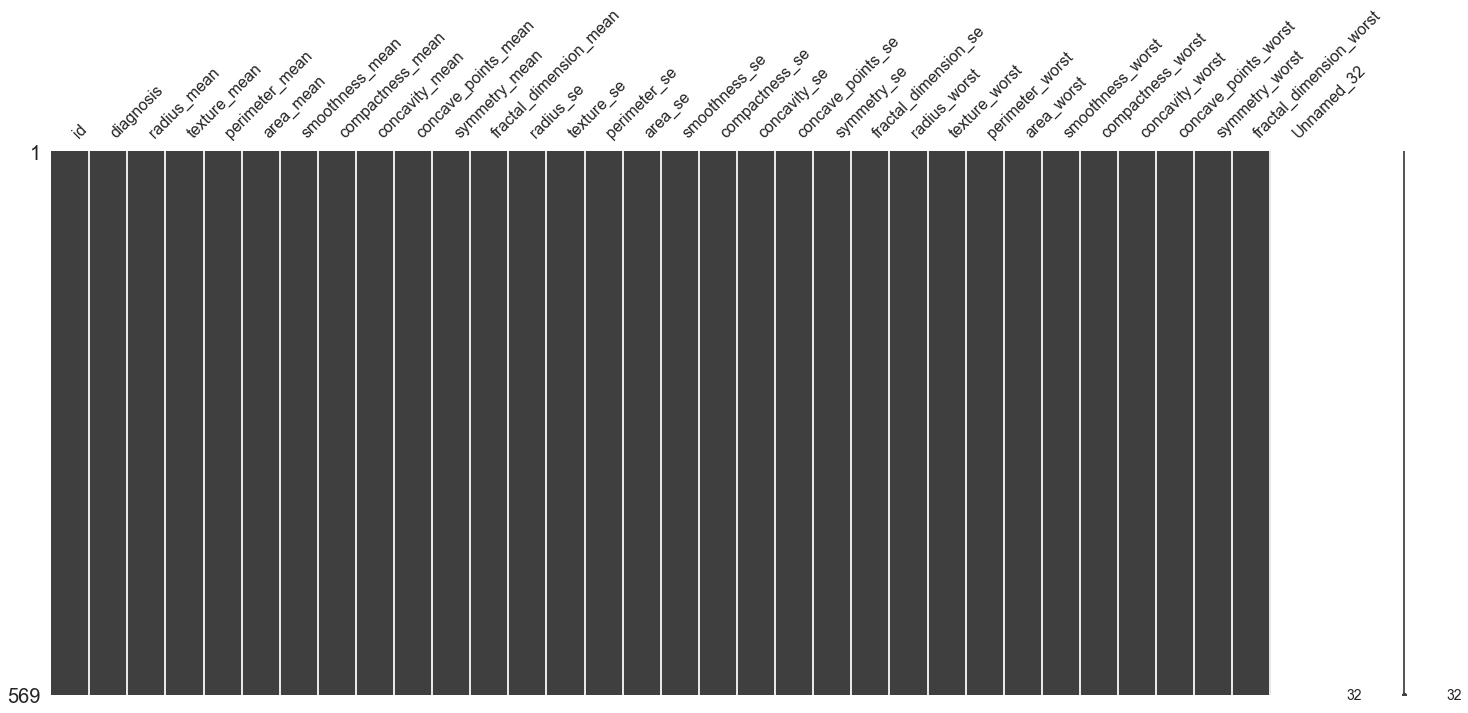

In [6]:
import missingno as msno
msno.matrix(df)
plt.show()

# Seaborn - Heatmap
### Relationship between columns
* 01 --> Direct proportion
* 00 --> No relationship
* -1 --> İnverse proportion

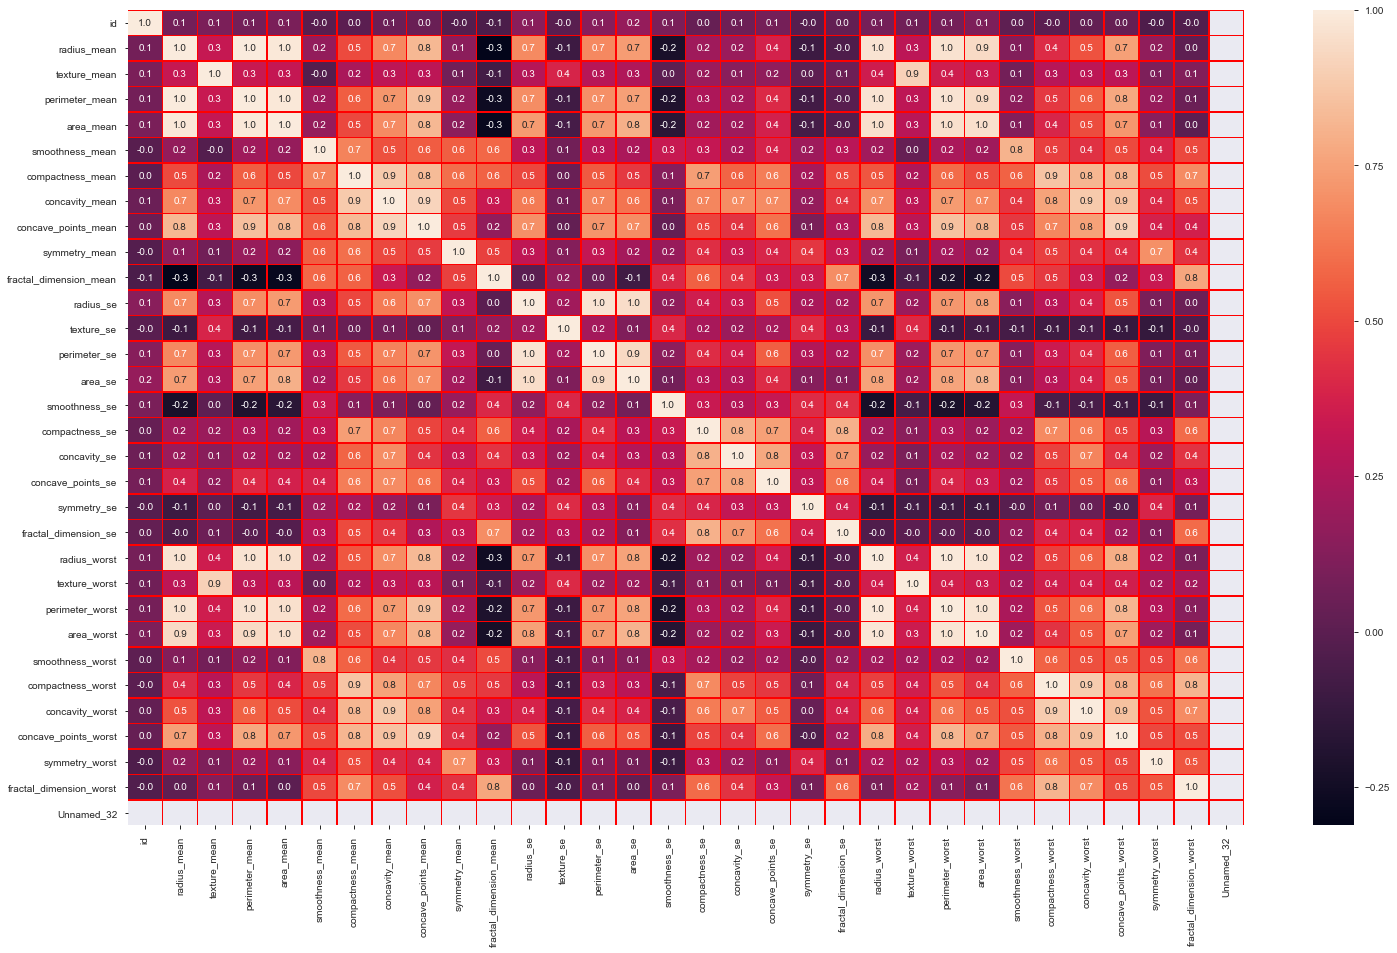

In [7]:
f,ax = plt.subplots(figsize=(25, 15))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

In [8]:
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M       17.990         10.38          122.80     1001.0   
1      842517         M       20.570         17.77          132.90     1326.0   
2    84300903         M       19.690         21.25          130.00     1203.0   
3    84348301         M       11.420         20.38           77.58      386.1   
4    84358402         M       20.290         14.34          135.10     1297.0   
5      843786         M       12.450         15.70           82.57      477.1   
6      844359         M       18.250         19.98          119.60     1040.0   
7    84458202         M       13.710         20.83           90.20      577.9   
8      844981         M       13.000         21.82           87.50      519.8   
9    84501001         M       12.460         24.04           83.97      475.9   
10     845636         M       16.020         23.24          102.70      797.8   
11   84610002         M       15.780         17.89          103.60      781.0   
12     846226         M       19.170         24.80          132.40     1123.0   
13     846381         M       15.850         23.95          103.70      782.7   
14   84667401         M       13.730         22.61           93.60      578.3   
15   84799002         M       14.540         27.54           96.73      658.8   
16     848406         M       14.680         20.13           94.74      684.5   
17   84862001         M       16.130         20.68          108.10      798.8   
18     849014         M       19.810         22.15          130.00     1260.0   
19    8510426         B       13.540         14.36           87.46      566.3   
20    8510653         B       13.080         15.71           85.63      520.0   
21    8510824         B        9.504         12.44           60.34      273.9   
22    8511133         M       15.340         14.26          102.50      704.4   
23     851509         M       21.160         23.04          137.20     1404.0   
24     852552         M       16.650         21.38          110.00      904.6   
25     852631         M       17.140         16.40          116.00      912.7   
26     852763         M       14.580         21.53           97.41      644.8   
27     852781         M       18.610         20.25          122.10     1094.0   
28     852973         M       15.300         25.27          102.40      732.4   
29     853201         M       17.570         15.05          115.00      955.1   
..        ...       ...          ...           ...             ...        ...   
539    921362         B        7.691         25.44           48.34      170.4   
540    921385         B       11.540         14.44           74.65      402.9   
541    921386         B       14.470         24.99           95.81      656.4   
542    921644         B       14.740         25.42           94.70      668.6   
543    922296         B       13.210         28.06           84.88      538.4   
544    922297         B       13.870         20.70           89.77      584.8   
545    922576         B       13.620         23.23           87.19      573.2   
546    922577         B       10.320         16.35           65.31      324.9   
547    922840         B       10.260         16.58           65.85      320.8   
548    923169         B        9.683         19.34           61.05      285.7   
549    923465         B       10.820         24.21           68.89      361.6   
550    923748         B       10.860         21.48           68.51      360.5   
551    923780         B       11.130         22.44           71.49      378.4   
552    924084         B       12.770         29.43           81.35      507.9   
553    924342         B        9.333         21.94           59.01      264.0   
554    924632         B       12.880         28.92           82.50      514.3   
555    924934         B       10.290         27.61           65.67      321.4   
556    924964         B       10.160      

# Separating Features and Labels

In [9]:
X=df.iloc[:, 2:32]
X.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave_points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave_points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

# Converting String Value To int Type for Labels
### Encode label category
* B (Benign) -> 0
* M (Malignant) -> 1

In [10]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [11]:
from sklearn.preprocessing import LabelEncoder
y=df.iloc[:,1]

encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

# Data Standardisation

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Splitting Dataset into Training Set and Testing Set

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Build Random Forest Model with Default Hyperparameter

In [14]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

# Accuracy Score

In [15]:
from sklearn import metrics
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9473684210526315


# Confusion Matrix with Seaborn - Heatmap
* B (Benign) -> 0
* M (Malignant) -> 1

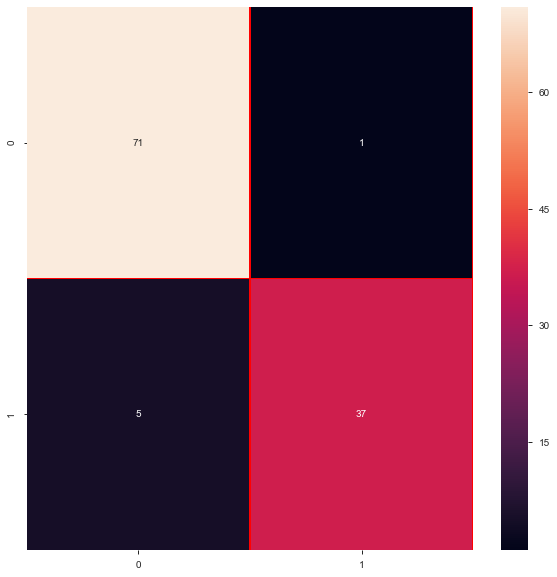

<Figure size 432x288 with 0 Axes>

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()
plt.savefig('ConfusionMatrix.png')

# F1 Score

In [17]:
from sklearn.metrics import  f1_score
f1_score = f1_score(y_test, y_pred)
print("F1 Score:")
print(f1_score)

F1 Score:
0.925


# Thank You

If you have any suggestion or advice or feedback, I will be very appreciated to hear them.
### Also there are other visualization kernels
* [FIFA 19 Player Data Analysis and Visualization EDA](https://www.kaggle.com/ismailsefa/f-fa-19-player-data-analysis-and-visualization-eda)
* [Crimes Data Analysis and Visualzation (EDA)](https://www.kaggle.com/ismailsefa/crimes-data-analysis-and-visualzation-eda)
* [Google Play Store Apps Data Analysis (EDA)](https://www.kaggle.com/ismailsefa/google-play-store-apps-data-analysis-eda)
* [World Happiness Data Analysis and Visualization](https://www.kaggle.com/ismailsefa/world-happiness-data-analysis-and-visualization)
* [Used Cars Data Analysis and Visualization (EDA)](https://www.kaggle.com/ismailsefa/used-cars-data-analysis-and-visualization-eda)
* [Gender Recognition by Voice Machine Learning SVM](https://www.kaggle.com/ismailsefa/gender-recognition-by-voice-machine-learning-svm)
* [Iris Species Classify Machine Learning KNN](https://www.kaggle.com/ismailsefa/iris-species-classify-machine-learning-knn)
* [Breast Cancer Diagnostic Machine Learning R-Forest](https://www.kaggle.com/ismailsefa/breast-cancer-diagnostic-machine-learning-r-forest)